<a href="https://colab.research.google.com/github/dhanushbabuk/DeepLearning-LAB/blob/main/DL_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'brain-tumor-mri-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F1608934%2F2645886%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240322%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240322T070056Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2b5176f6883fd8ad1729ca1893cd52598dac3865331befcae130b238082e055e3682de49ee93ea738b41a3d3d7298048533baa80eec34b8604d2818ee3af5b63d405592087a3e877cd532375015f5aee4a99855fa07119914cda8ca745f2d07810cd0cd31f43704a16642bca6e0c4554176c1e92a230b15dcbb5b9155e10e6c59947f5fde0f0e515daf5b83163916781992c18cf038ecf2f6bbb1b4d077f8a55218d0c6798f2dbc12d161434546f9da28c5ad9b908648bc5ac8ada9c0fd1686044ae3935d9106dcd1c3eee2f07cc090e870abba0931491d8ab82153e3fe054cbd71fee4d73c4aad0e191f9840cfe310c0dd8f1b096342361723f76c2c3fac0f7'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


Number of train_glioma:  1321
Number of train_meningioma:  1339
Number of train_pituitary:  1457
Number of train_no:  1595
Number of test_glioma:  300
Number of test_meningioma:  306
Number of test_pituitary:  300
Number of test_no:  405


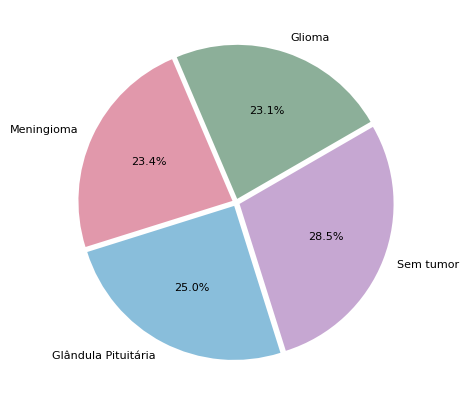

In [ ]:
import os
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

# Update the path to the dataset
main_dir = "/kaggle/input"
dataset_path = os.path.join(main_dir, "brain-tumor-mri-dataset")

train_glioma = glob.glob(os.path.join(dataset_path, "Training/glioma/*.jpg"))
train_meningioma = glob.glob(os.path.join(dataset_path, "Training/meningioma/*.jpg"))
train_pituitary = glob.glob(os.path.join(dataset_path, "Training/pituitary/*.jpg"))
train_no = glob.glob(os.path.join(dataset_path, "Training/notumor/*.jpg"))

# Test
test_glioma = glob.glob(os.path.join(dataset_path, "Testing/glioma/*.jpg"))
test_meningioma = glob.glob(os.path.join(dataset_path, "Testing/meningioma/*.jpg"))
test_pituitary = glob.glob(os.path.join(dataset_path, "Testing/pituitary/*.jpg"))
test_no = glob.glob(os.path.join(dataset_path, "Testing/notumor/*.jpg"))

train_glioma_number = len(train_glioma)
train_meningioma_number = len(train_meningioma)
train_pituitary_number = len(train_pituitary)
train_no_number = len(train_no)
test_glioma_number = len(test_glioma)
test_meningioma_number = len(test_meningioma)
test_pituitary_number = len(test_pituitary)
test_no_number = len(test_no)

print("Number of train_glioma: ", train_glioma_number)
print("Number of train_meningioma: ", train_meningioma_number)
print("Number of train_pituitary: ", train_pituitary_number)
print("Number of train_no: ", train_no_number)
print("Number of test_glioma: ", test_glioma_number)
print("Number of test_meningioma: ", test_meningioma_number)  # This should be test_meningioma_number
print("Number of test_pituitary: ", test_pituitary_number)  # This should be test_pituitary_number
print("Number of test_no: ", test_no_number)

full_glioma = train_glioma_number + test_glioma_number
full_no_tumor = train_no_number + test_no_number
full_meningioma = train_meningioma_number + test_meningioma_number
full_pituitary = train_pituitary_number + test_pituitary_number

plt.figure(figsize=(5, 5))
colors = ['#8CAF99', '#E198AB', "#89BEDB", "#C6A7D2"]
labels = ['Glioma', 'Meningioma', 'Glândula Pituitária', 'Sem tumor']
plt.rcParams.update({'font.size': 8})

sizes = [full_glioma, full_meningioma, full_pituitary, full_no_tumor]

plt.pie(sizes, labels=labels, colors=colors, autopct='%.1f%%', explode=(0.025, 0.025, 0.025, 0.025), startangle=30)
plt.show()


# # # **Pre - processing**

In [ ]:
import cv2
import os

def resize_images(dataset_path, output_path, target_size=(256, 256)):
    # Ensure that the output directory exists
    os.makedirs(output_path, exist_ok=True)

    # List all files in the dataset directory
    image_files = [f for f in os.listdir(dataset_path) if os.path.isfile(os.path.join(dataset_path, f))]

    for image_file in image_files:
        add_pixels = 0
        # Full path of the original image
        input_image_path = os.path.join(dataset_path, image_file)
        # Load the image
        img = cv2.imread(input_image_path)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Threshold the grayscale image
        thresh = cv2.threshold(img_gray, 45, 255, cv2.THRESH_BINARY)[1]
        # Find contours in thresholded image, then grab the largest one
        cnts, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        c = max(cnts, key=cv2.contourArea)
        # Find the extreme points
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        # Create a new image by cropping the region defined by extreme points
        new_img = img[extTop[1] - add_pixels:extBot[1] + add_pixels, extLeft[0] - add_pixels:extRight[0] + add_pixels].copy()

        # Load the image
        resized_img = cv2.resize(new_img, target_size)

        # Create the output path and save the resized image
        output_image_path = os.path.join(output_path, image_file)
        cv2.imwrite(output_image_path, resized_img)


# Set up paths
main_dir = "/kaggle/input"
dataset_path = os.path.join(main_dir, "brain-tumor-mri-dataset")

# Preprocessing paths
preprocessing_dir =  os.path.join("/kaggle/working/preprocessing")

os.makedirs(preprocessing_dir, exist_ok=True)

# Testing paths
testing_dir = os.path.join(dataset_path, "Testing")
testing_preprocessed_dir = os.path.join(preprocessing_dir, "Testing")
os.makedirs(testing_preprocessed_dir, exist_ok=True)

# Testing glioma tumor
glioma_dataset = os.path.join(testing_dir, "glioma")
glioma_output = os.path.join(testing_preprocessed_dir, "glioma")
resize_images(glioma_dataset, glioma_output, target_size=(256, 256))

# Testing meningioma tumor
meningioma_dataset = os.path.join(testing_dir, "meningioma")
meningioma_output = os.path.join(testing_preprocessed_dir, "meningioma")
resize_images(meningioma_dataset, meningioma_output, target_size=(256, 256))

# Testing no tumor
no_tumor_dataset = os.path.join(testing_dir, "notumor")
no_tumor_output = os.path.join(testing_preprocessed_dir, "notumor")
resize_images(no_tumor_dataset, no_tumor_output, target_size=(256, 256))

# Testing pituitary tumor
pituitary_dataset = os.path.join(testing_dir, "pituitary")
pituitary_output = os.path.join(testing_preprocessed_dir, "pituitary")
resize_images(pituitary_dataset, pituitary_output, target_size=(256, 256))


# Training paths
training_dir = os.path.join(dataset_path, "Training")
training_preprocessed_dir = os.path.join(preprocessing_dir, "Training")
os.makedirs(training_preprocessed_dir, exist_ok=True)

# Training glioma tumor
glioma_dataset = os.path.join(training_dir, "glioma")
glioma_output = os.path.join(training_preprocessed_dir, "glioma")
resize_images(glioma_dataset, glioma_output, target_size=(256, 256))

# Training meningioma tumor
meningioma_dataset = os.path.join(training_dir, "meningioma")
meningioma_output = os.path.join(training_preprocessed_dir, "meningioma")
resize_images(meningioma_dataset, meningioma_output, target_size=(256, 256))

# Training no tumor
no_tumor_dataset = os.path.join(training_dir, "notumor")
no_tumor_output = os.path.join(training_preprocessed_dir, "notumor")
resize_images(no_tumor_dataset, no_tumor_output, target_size=(256, 256))

# Training pituitary tumor
pituitary_dataset = os.path.join(training_dir, "pituitary")
pituitary_output = os.path.join(training_preprocessed_dir, "pituitary")
resize_images(pituitary_dataset, pituitary_output, target_size=(256, 256))


# **Building the model**#


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score
import os

def validate_model(model, val_loader, criterion, device='cuda'):
    model.eval()
    val_loss = 0.0
    all_val_outputs = []
    all_val_targets = []

    with torch.no_grad():
        for val_inputs, val_targets in val_loader:
            # Move the data to the device
            val_inputs, val_targets = val_inputs.to(device), val_targets.to(device)

            # Get the model predictions
            val_outputs = model(val_inputs)

            # Calculate the loss
            loss = criterion(val_outputs, val_targets)
            val_loss += loss.item()

            all_val_outputs.append(val_outputs)
            all_val_targets.append(val_targets)

    val_loss /= len(val_loader)
    val_outputs = torch.cat(all_val_outputs, dim=0)
    val_targets = torch.cat(all_val_targets, dim=0)

    # Move the predictions and targets to CPU for calculating accuracy
    val_outputs_cpu = val_outputs.cpu()
    val_predictions = torch.argmax(val_outputs_cpu, axis=1)
    val_targets_cpu = val_targets.cpu()

    # Calculate predictions and accuracy
    val_accuracy = accuracy_score(val_targets_cpu.numpy(), val_predictions.numpy())

    return val_loss, val_accuracy

# Check if CUDA is available, otherwise use CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Set up paths
main_dir = "/kaggle/input"
dataset_path = os.path.join(main_dir, "brain-tumor-mri-dataset")

# Image preprocessing Transformation
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load Datasets
train_dataset = datasets.ImageFolder(root=os.path.join("/kaggle/working/preprocessing/Training"), transform=transform)
val_dataset = datasets.ImageFolder(root=os.path.join('/kaggle/working/preprocessing/Testing'), transform=transform)

# Define DataLoader to load the data in batches.
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=1)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# Define neural network architecture
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(128 * 56 * 56, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 128 * 56 * 56)
        x = self.fc1(x)
        return x

# Instantiate the model.
model = SimpleCNN(num_classes=4).to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    # Validate
    val_loss, val_accuracy = validate_model(model, val_loader, criterion)
    print(f'Epoch [{epoch+1}/{num_epochs}], Val Loss: {val_loss:.2f}, Val Accuracy: {val_accuracy:.2f}')

# Save the trained model
torch.save({
    'epoch': num_epochs,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': loss,
}, os.path.join('/kaggle/working/preprocessing', 'modelo_treinado.pth'))

print("Training Completed.")
# Get information about the device.
print("Current Device:", device)
print("Device Name:", torch.cuda.get_device_name(device) if device.type == "cuda" else "CPU")
print("GPU Compute Capability:", torch.cuda.get_device_capability(device) if device.type == "cuda" else "N/A")
print("Number of available GPUs:", torch.cuda.device_count() if torch.cuda.is_available() else 0)



Epoch [1/10], Val Loss: 0.77, Val Accuracy: 0.72
Epoch [2/10], Val Loss: 0.56, Val Accuracy: 0.79
Epoch [3/10], Val Loss: 0.58, Val Accuracy: 0.80
Epoch [4/10], Val Loss: 0.49, Val Accuracy: 0.82
Epoch [5/10], Val Loss: 0.47, Val Accuracy: 0.83
Epoch [6/10], Val Loss: 0.44, Val Accuracy: 0.84
Epoch [7/10], Val Loss: 0.46, Val Accuracy: 0.84
Epoch [8/10], Val Loss: 0.44, Val Accuracy: 0.85
Epoch [9/10], Val Loss: 0.45, Val Accuracy: 0.84
Epoch [10/10], Val Loss: 0.40, Val Accuracy: 0.86
Training Completed.
Current Device: cuda
Device Name: Tesla T4
GPU Compute Capability: (7, 5)
Number of available GPUs: 2


In [ ]:
# accuracy is 80%